<a href="https://colab.research.google.com/github/Blackstocks/GenAI/blob/main/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bag of Words**

In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.DataFrame({'text': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'], 'output': [1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


```
sklearn = A library that helps you build machine learning models.

feature_extraction = Taking useful data (features) out of something — in this case, from text.

feature_extraction.text = You're working with text data.

CountVectorizer = A tool that:
                    Finds all words (vocabulary)
                    Converts text into numbers using word counts
```



In [7]:
bow = cv.fit_transform(df['text'])

In [8]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


campusx is column 0.     

comment is column 1.    

people is column 2.      

watch is column 3.      

write is column 4.      


In [9]:
bow.toarray()

array([[1, 0, 1, 1, 0],
       [2, 0, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1]])

In [10]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[1 0 1 1 0]]
[[2 0 0 1 0]]
[[0 1 1 0 1]]
[[1 1 0 0 1]]


In [11]:
cv.transform(["campusx watch and write comment of campusx"]).toarray()

array([[2, 1, 0, 1, 1]])



```
[2, 1, 0, 1, 1] → campusx(2), comment(1), people(0), watch(1), write(1)

```



In [12]:
x = bow.toarray()
y = df['output'].values

In [14]:
x

array([[1, 0, 1, 1, 0],
       [2, 0, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1]])

In [15]:
y

array([1, 1, 0, 0])

## **N-grams**

In [16]:
df = pd.DataFrame({'text': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'], 'output': [1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [17]:
# Bi gram
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [18]:
bow = cv.fit_transform(df['text'])

In [19]:
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [20]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[0 0 1 0 1 0]]
[[1 0 0 0 1 0]]
[[0 0 0 1 0 1]]
[[0 1 0 0 0 1]]


In [22]:
# Ti gram
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3,3))

In [23]:
bow = cv.fit_transform(df['text'])

In [24]:
print(cv.vocabulary_)

{'people watch campusx': 2, 'campusx watch campusx': 0, 'people write comment': 3, 'campusx write comment': 1}


In [25]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[0 0 1 0]]
[[1 0 0 0]]
[[0 0 0 1]]
[[0 1 0 0]]


## **TF-IDF**

In [26]:
df = pd.DataFrame({'text': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'], 'output': [1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [38]:
tfidf = tf.fit_transform(df['text']).toarray() #what difference between if we apply .toarray() and when we dont apply

In [39]:
print(tf.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [40]:
tfidf

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [42]:
print(tf.idf_)

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]


## **Word2Vec [Deep Learning feature]**

In [1]:
!pip install --upgrade gensim --user

In [2]:
import numpy as np
import pandas as pd
import gensim #this file have word2vec architechture
import os

In [14]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

punkt is a pre-trained model used by the NLTK library to split a paragraph into individual sentences. It is not a Python function or module that can be imported directly, which is why we use nltk.download('punkt') to download the data files required for sentence tokenization. This download is only needed once per machine or environment. For example, when we use from nltk.tokenize import sent_tokenize and then call sent_tokenize("I love Python. It's awesome!"), NLTK internally uses the punkt model to understand where one sentence ends and another begins. Without downloading punkt, this function will raise an error because it depends on that data to function properly

In [15]:
story = []
for filename in os.listdir('data'):
  if filename == '.ipynb_checkpoints':
    pass
  f = open(os.path.join('data', filename))
  corpus = f.read()
  raw_sent = sent_tokenize(corpus)
  for sent in raw_sent:
    story.append(simple_preprocess(sent))

In [16]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


In [17]:
len(story)

27244

In [18]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

window=10: Look at 10 words before and after the target word — to understand its context.

min_count=2: Only keep words that appear at least 2 times in your dataset. Rare words are ignored.

In [19]:
model.build_vocab(story)

In [20]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(1058842, 1423500)

the real training begins — Word2Vec learns which words appear near each other and starts forming patterns.

1,058,842 words were processed.                                 
1,423,500 total training operations happened


# **what exactly does this means "story, total_examples=model.corpus_count, epochs=model.epochs"**

story
This is your input data — a list of tokenized and preprocessed sentences (each sentence is a list of words).
story = [['winter', 'is', 'coming'], ['sansa', 'loves', 'snow'], ...]



total_examples=model.corpus_count
This tells the model how many total sentences (or examples) you are giving it to train on.                     
model.corpus_count is automatically set when you call model.build_vocab(story).               
It counts how many sentences (lists of words) are in story

Example:
If your story has 1,000 sentences, model.corpus_count will be 1000.


epochs=model.epochs
This tells the model how many times to go through the data during training.              
One "epoch" means the model looks at every sentence once.               
More epochs = better learning (up to a point)

By default, model.epochs is something like 5, unless you set it manually.



```
model = Word2Vec(
    vector_size=300,  # 👈 now each word will be 300-d rather than default 100-d
    window=10,
    min_count=2,
    epochs=10  # 👈 setting epochs manually here
)
```
or


```
model.train(story, total_examples=model.corpus_count, epochs=15)

```




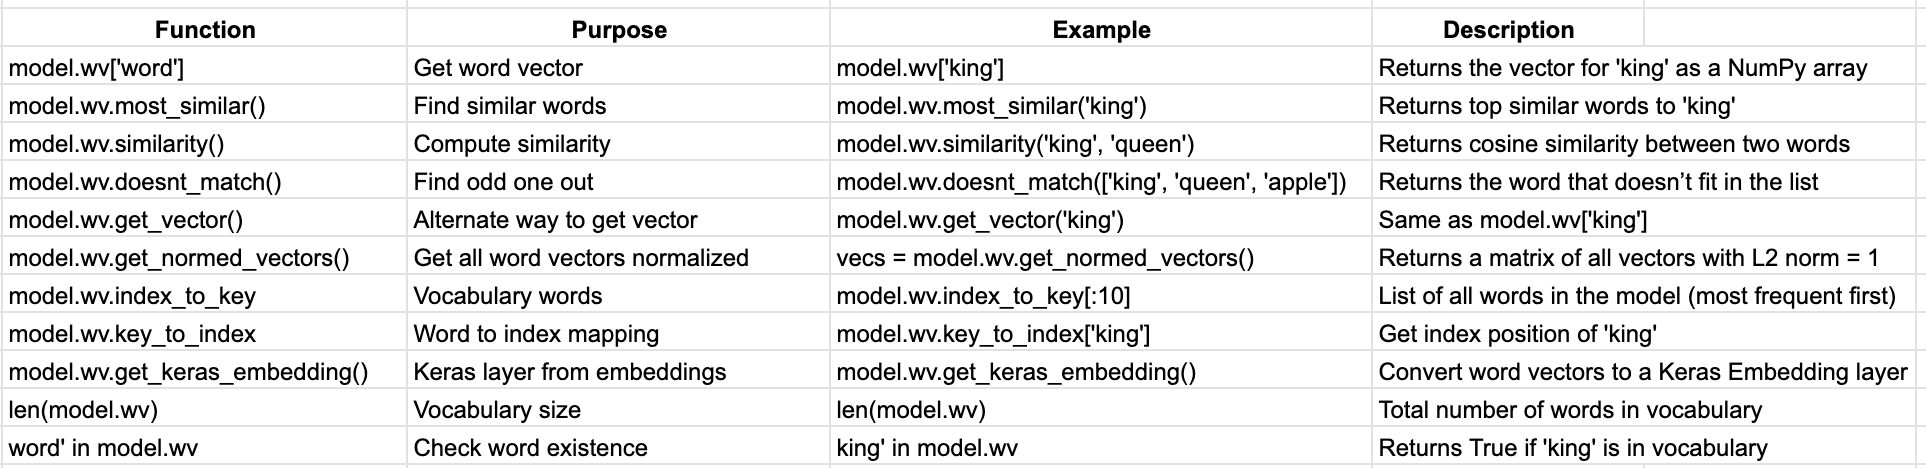

In [23]:
model.wv.most_similar('sansa')

[('bran', 0.9823817014694214),
 ('jon', 0.9819417595863342),
 ('arya', 0.9787338376045227),
 ('herself', 0.963513970375061),
 ('wishing', 0.9567778706550598),
 ('catelyn', 0.9534403085708618),
 ('robb', 0.9508499503135681),
 ('reply', 0.9502400755882263),
 ('once', 0.9492922425270081),
 ('loss', 0.9481130242347717)]

In [27]:
model.wv.similarity('daenerys', 'sansa')

0.79941815

In [28]:
model.wv['deep'].shape

(100,)

In [29]:
vec = model.wv.get_normed_vectors()

In [30]:
vec

array([[-0.0715143 ,  0.03744825, -0.00215606, ..., -0.19183119,
        -0.04222055,  0.09690793],
       [-0.05154177,  0.06648249, -0.00613491, ..., -0.20450675,
         0.04980842,  0.03648003],
       [-0.17402034,  0.0475459 ,  0.0622351 , ..., -0.01681362,
         0.04825297, -0.13344923],
       ...,
       [-0.06799801, -0.04421631,  0.07216331, ..., -0.15502553,
         0.06339901, -0.0992575 ],
       [-0.03738281,  0.05868676,  0.00641212, ..., -0.15731184,
        -0.00468009, -0.02060407],
       [ 0.01069982,  0.0883607 , -0.01306394, ..., -0.1648385 ,
         0.06850488, -0.02850349]], dtype=float32)

In [31]:
y = model.wv.index_to_key

In [32]:
len(y)

7432

In [33]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'her',
 'you',
 'in',
 'it',
 'she',
 'had',
 'as',
 'him',
 'with',
 'that',
 'said',
 'not',
 'for',
 'at',
 'on',
 'they',
 'but',
 'is',
 'my',
 'lord',
 'no',
 'from',
 'them',
 'have',
 'would',
 'were',
 'be',
 'all',
 'your',
 'when',
 'ser',
 'me',
 'if',
 'will',
 'so',
 'jon',
 'could',
 'what',
 'one',
 'ned',
 'man',
 'their',
 'there',
 'king',
 'up',
 'out',
 'are',
 'this',
 'back',
 'been',
 'we',
 'do',
 'did',
 'father',
 'down',
 'tyrion',
 'like',
 'men',
 'by',
 'hand',
 'page',
 'eyes',
 'bran',
 'than',
 'now',
 'only',
 'or',
 'told',
 'see',
 'catelyn',
 'who',
 'more',
 'arya',
 'off',
 'here',
 'even',
 'an',
 'face',
 'boy',
 'over',
 'brother',
 'into',
 'know',
 'sansa',
 'old',
 'dany',
 'black',
 'robb',
 'before',
 'never',
 'looked',
 'robert',
 'well',
 'long',
 'time',
 'stark',
 'then',
 'yet',
 'head',
 'can',
 'too',
 'away',
 'made',
 'where',
 'night',
 'lady',
 'through',
 'lannister',
 'ma

In [34]:
from sklearn.decomposition import PCA #Principal Component Analysis (PCA)
pca = PCA(n_components=3)
x = pca.fit_transform(model.wv.get_normed_vectors())

Principal Component Analysis (PCA) is used here to reduce high-dimensional vectors (100D) to 3 dimensions — which makes them visually plottable in 3D.


In [35]:
x

array([[ 0.3494765 , -0.22779143,  0.28820384],
       [ 0.44785288, -0.09554809,  0.18318418],
       [-0.42396763, -0.11128211,  0.00207818],
       ...,
       [-0.15225016, -0.03601325, -0.13128547],
       [ 0.20155108,  0.08134997,  0.10245252],
       [ 0.32145998, -0.03989464, -0.05134265]], dtype=float32)

In [37]:
x.shape

(7432, 3)

In [40]:
import plotly.express as px
fig = px.scatter_3d(
    x[200:300],     # Take only 100 words (from index 200 to 299)
    x=0, y=1, z=2,   # Use PCA component 0, 1, and 2 as axes
    color=y[200:300]  # Color points using the word labels (word names)
)
fig.show()